In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, optimizers
import matplotlib.pyplot as plt

In [ ]:
(train_imgs, train_labels),(test_imgs, test_labels) = datasets.cifar10.load_data()

In [ ]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

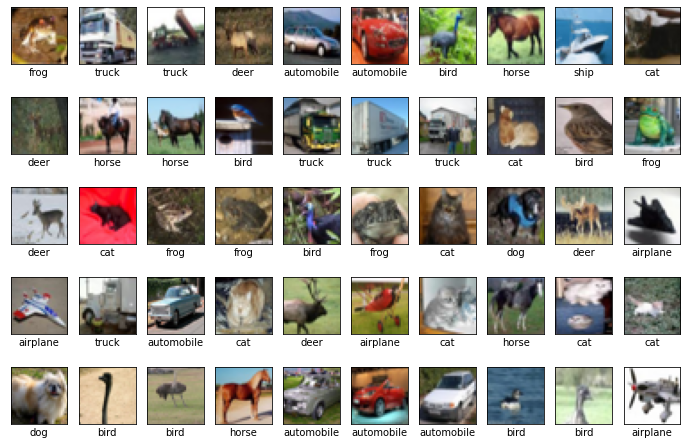

In [ ]:
plt.figure(figsize=(12,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(train_imgs[i])
    plt.xlabel(categories[train_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3,3), kernel_initializer='he_uniform', padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3,3), kernel_initializer='he_uniform', padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, (3,3), kernel_initializer='he_uniform', padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(32))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)       

In [ ]:
opt = optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
h = model.fit(train_imgs, train_labels, epochs=10, validation_data=(test_imgs, test_labels))

Epoch 1/10
1563/1563 [==============================] - 25s 15ms/step - loss: 0.6696 - accuracy: 0.7647 - val_loss: 0.7388 - val_accuracy: 0.7456
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6648 - accuracy: 0.7639 - val_loss: 0.7050 - val_accuracy: 0.7576
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6584 - accuracy: 0.7704 - val_loss: 0.6902 - val_accuracy: 0.7630
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6461 - accuracy: 0.7737 - val_loss: 0.7057 - val_accuracy: 0.7605
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6402 - accuracy: 0.7748 - val_loss: 0.7010 - val_accuracy: 0.7626
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6230 - accuracy: 0.7815 - val_loss: 0.7078 - val_accuracy: 0.7559
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6236 - accuracy: 0.7824 - val_loss: 0.7264 -

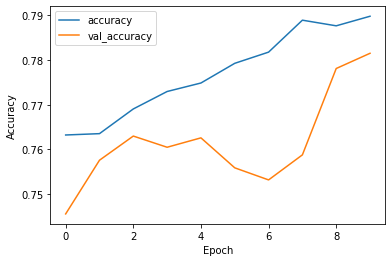

In [ ]:
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.xlim([0,10])
#plt.ylim([0,1])
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.6392 - accuracy: 0.7815


In [ ]:
model_predictions = model.predict(test_imgs)

In [ ]:
model_predictions[0]

array([5.6328383e-05, 1.2339469e-05, 1.9633556e-04, 8.8246340e-01,
       5.4209237e-04, 8.1342205e-02, 3.5316315e-02, 2.0453619e-05,
       3.4424869e-05, 1.6039325e-05], dtype=float32)

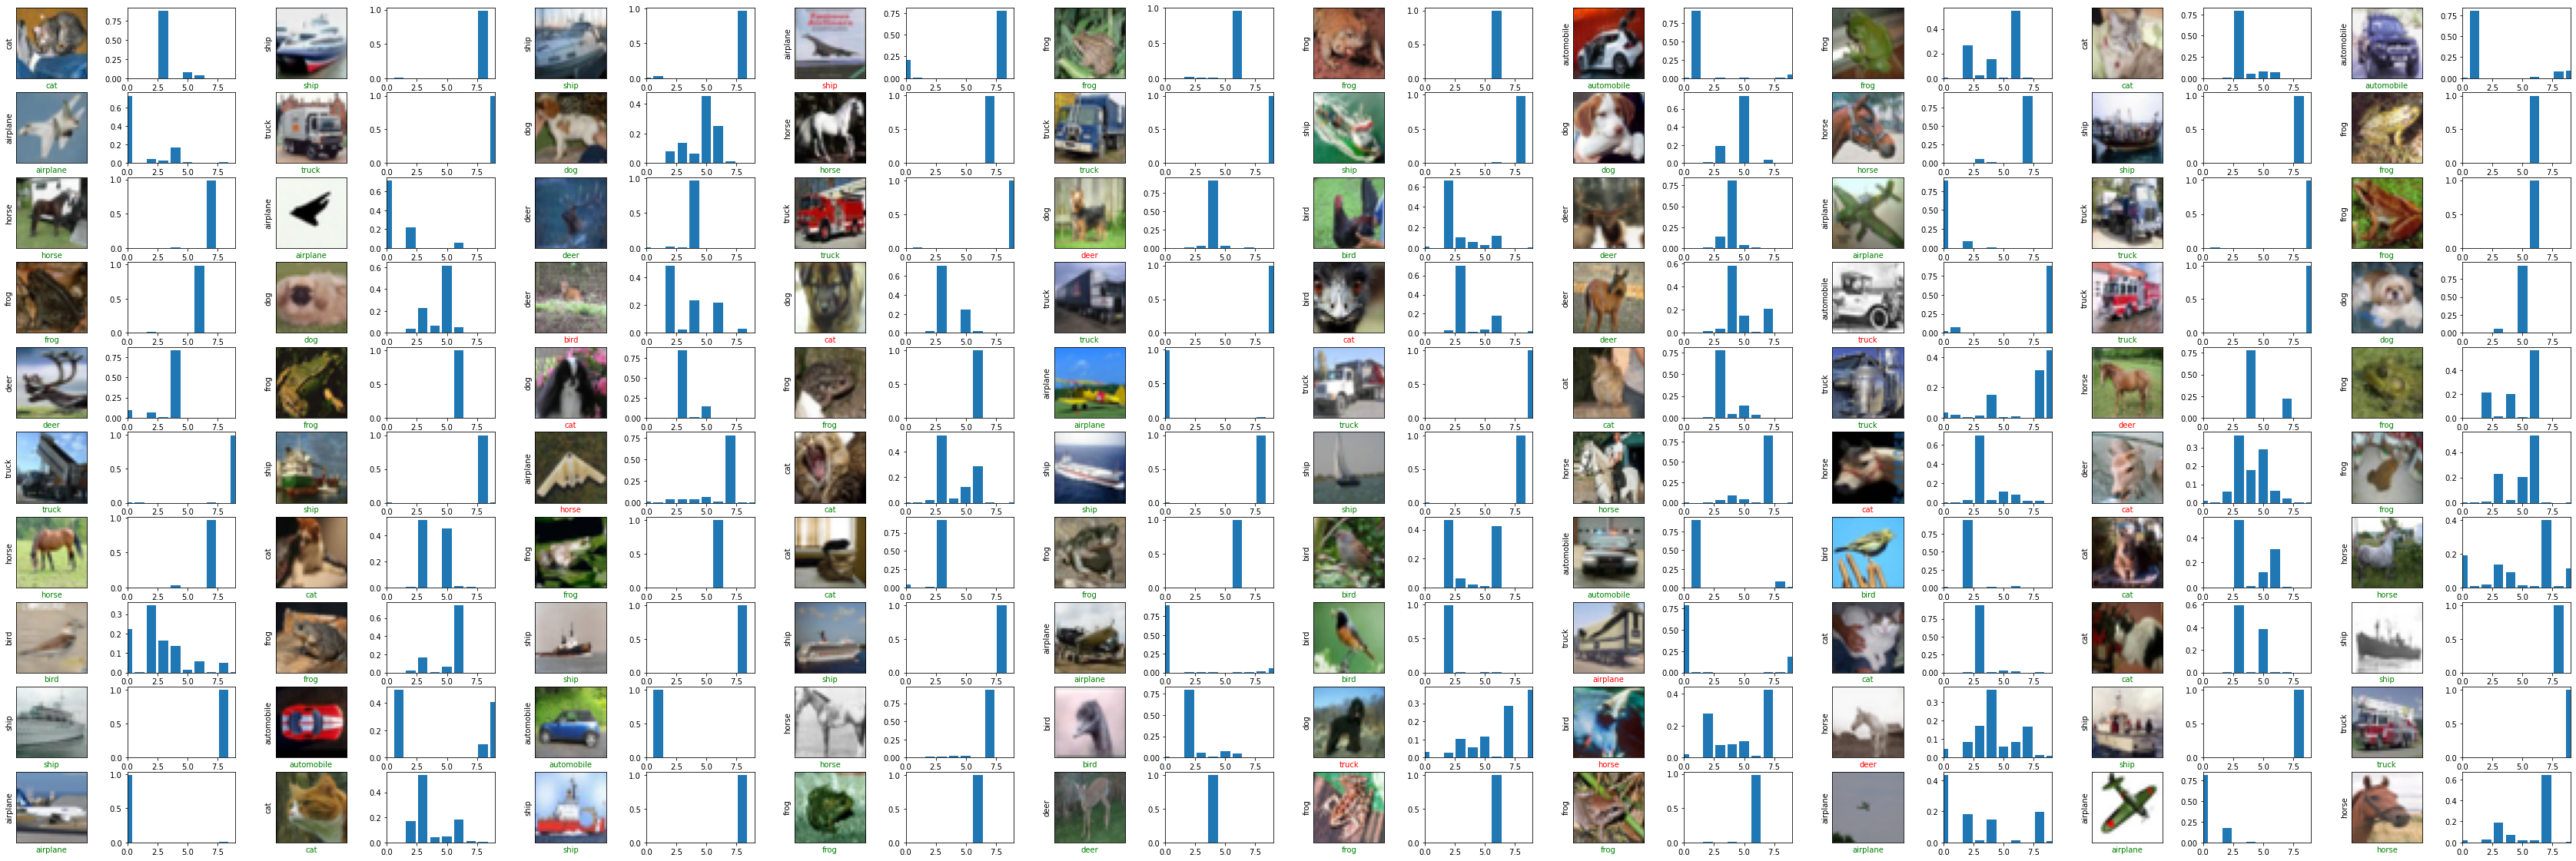

In [ ]:
import numpy as np

num_row = 10
num_col = 10
total_img = num_row*num_col
plt.figure(figsize=(3*2*num_col, 2*num_row))

fno = 0
for i in range(total_img):
    plt.subplot(num_row, 2*num_col, 2*fno+1)
    arr = model_predictions[i]
    pl = np.argmax(arr)

    
    plt.imshow(test_imgs[i])
    plt.xticks([])
    plt.yticks([])
    c = 'red'
    if test_labels[i][0] == pl:
        c = 'green'
    plt.xlabel(categories[pl], color=c)
    plt.ylabel(categories[test_labels[i][0]])

    plt.subplot(num_row, 2*num_col, 2*fno+2)
    plt.bar(range(10), arr)
    plt.xlim([0,9])
    fno = fno+1
plt.show()

In [ ]:
%load_ext tensorboard

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

